<a href="https://colab.research.google.com/github/MarybenK/Portfolio/blob/main/Maryben_Chiatoh_Technology_Portfolio_WIL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Portfolio Assignment: Replicating WIL Project Using Open Data**
#Project Title: Used Car Price Prediction & Market Analysis

**Confidentiality Disclaimer**:

This project replicates the methodology of a confidential industry project completed during my Work-Integrated Learning experience. All data shown here are open-source and not affiliated with the client organization.

**Dataset:** `used_cars.csv` (Kaggle open dataset)  
**Goal:** Predict a vehicle’s listed **price** using attributes such as year, mileage, brand/model, fuel type, transmission, and engine information.

This notebook follows the **CRISP-DM** structure:
1. Business Understanding  
2. Data Understanding  
3. Data Preparation  
4. Modeling  
5. Evaluation  
6. Deployment (proposal)


#**1. Business Understanding**

**Project Goal**

Develop a predictive model to estimate used car prices based on vehicle features, mileage, age, brand, and accident history. This helps buyers and sellers make informed pricing decisions and understand market trends.

**Objectives**
- Predict used car prices using regression models.
- Identify key factors influencing car prices.
- Provide a user-friendly interface for price estimation.
- Compare model performance and select the best one.

**Success Metrics**

- Achieve R² score > 0.85
- Mean Absolute Error (MAE) < $5,000
- Provide feature importance analysis
- Create a deployable model for real-time pricing


#**2. Data Understanding**
**Dataset Source**

- Name: Used Cars Dataset (Kaggle)
- Link: Kaggle Used Cars Dataset
- Size: 50,000+ entries
- Features: Brand, model, year, mileage, fuel type, engine specs, transmission,color, accident history, clean title, price, etc.

**Data Overview**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('used_cars.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (4009, 12)

First few rows:


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


Dataset Schema and Structure

The dataset consists of 4,009 observations and 12 variables, representing used vehicle listings. Each record corresponds to a single vehicle and includes attributes describing vehicle specifications, condition, and listing price. The schema reflects real-world automotive listing data and is suitable for supervised machine learning tasks.The dataset contains no duplicate rows, and all records are valid listings.

**Initial Observations**

- Mixed data types (numeric, categorical, text)
- Missing values in fuel_type, clean_title, accident
- price column contains $ and commas
- milage column contains " mi." and commas

In [2]:
# Basic data exploration
print("DATASET INFORMATION")
print(f"Total records: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")
print("\n COLUMNS ")
print(df.columns.tolist())
print("\n DATA TYPES ")
print(df.dtypes)
print("\n MISSING VALUES ")
print(df.isnull().sum())
print("\n BASIC STATISTICS ")
df.describe(include='all')

DATASET INFORMATION
Total records: 4009
Total features: 12

 COLUMNS 
['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']

 DATA TYPES 
brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

 MISSING VALUES 
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

 BASIC STATISTICS 


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009.000000,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,NaN,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,NaN,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,NaN,16,3309,52,1037,905,2025,2910,3413,39
mean,NaN,NaN,2015.515590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.104816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Let's look at the distribution of key numerical features
print("=== MODEL YEAR DISTRIBUTION ===")
print(f"Oldest: {df['model_year'].min()}")
print(f"Newest: {df['model_year'].max()}")
print(f"Average: {df['model_year'].mean():.1f}")

# Check unique values in categorical columns
print("\n=== UNIQUE VALUES IN CATEGORICAL COLUMNS ===")
categorical_cols = ['brand', 'fuel_type', 'accident', 'clean_title']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Check price distribution
print("\n=== PRICE RANGE ===")
print(df['price'].head(10))

=== MODEL YEAR DISTRIBUTION ===
Oldest: 1974
Newest: 2024
Average: 2015.5

=== UNIQUE VALUES IN CATEGORICAL COLUMNS ===
brand: 57 unique values
fuel_type: 7 unique values
accident: 2 unique values
clean_title: 1 unique values

=== PRICE RANGE ===
0    $10,300
1    $38,005
2    $54,598
3    $15,500
4    $34,999
5    $14,798
6    $31,000
7     $7,300
8    $41,927
9    $69,950
Name: price, dtype: object


#**3. Data Preparation**
### Data Cleaning

This data cleaning step prepares the raw used-car dataset for analysis and modeling by standardizing formats, handling missing values, and creating useful features. Price and mileage values are converted from text into numeric form so they can be analyzed correctly. Missing categorical values (fuel type, accident history, and title status) are filled with `"Unknown"`, while missing numeric values (mileage and horsepower) are imputed using the median to reduce the impact of outliers.

New features are created to improve model performance, including **car age** (derived from the model year) and **engine horsepower** (extracted from unstructured engine descriptions). The dataset is then simplified by keeping only columns relevant to pricing, and extreme price outliers are removed to improve stability and realism. The final result is a clean, consistent, and machine-learning-ready dataset suitable for EDA and downstream modeling.


In [4]:
# Data Cleaning Function
def clean_data(df):
    df_clean = df.copy()

    # 1. Clean price column - remove $ and commas, convert to float
    df_clean['price'] = df_clean['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')

    # 2. Clean mileage column - extract numeric value
    df_clean['milage'] = df_clean['milage'].str.replace(' mi.', '', regex=False).str.replace(',', '', regex=False)
    df_clean['milage'] = pd.to_numeric(df_clean['milage'], errors='coerce')

    # 3. Handle missing values
    # Fill missing fuel_type with 'Unknown'
    df_clean['fuel_type'] = df_clean['fuel_type'].fillna('Unknown')

    # Fill missing accident with 'Unknown'
    df_clean['accident'] = df_clean['accident'].fillna('Unknown')

    # Fill missing clean_title with 'Unknown'
    df_clean['clean_title'] = df_clean['clean_title'].fillna('Unknown')

    # Fill missing mileage with median
    df_clean['milage'] = df_clean['milage'].fillna(df_clean['milage'].median())

    # 4. Create new features
    # Age of the car
    df_clean['car_age'] = 2024 - df_clean['model_year']

    # Extract engine horsepower if available
    def extract_hp(engine_str):
        if pd.isna(engine_str):
            return np.nan
        # Look for patterns like "300.0HP" or "300 HP"
        import re
        hp_pattern = r'(\d+\.?\d*)\s*HP'
        match = re.search(hp_pattern, str(engine_str))
        if match:
            return float(match.group(1))
        return np.nan

    df_clean['horsepower'] = df_clean['engine'].apply(extract_hp)

    # Fill missing horsepower with median
    df_clean['horsepower'] = df_clean['horsepower'].fillna(df_clean['horsepower'].median())

    # 5. Drop irrelevant columns or columns with too many missing values
    # Keep only relevant columns for modeling
    columns_to_keep = ['brand', 'model_year', 'milage', 'fuel_type', 'car_age',
                      'horsepower', 'accident', 'clean_title', 'price']

    df_clean = df_clean[columns_to_keep]

    # 6. Remove outliers (cars priced above $500,000 and below $1,000)
    df_clean = df_clean[(df_clean['price'] > 1000) & (df_clean['price'] < 500000)]

    # 7. Reset index
    df_clean = df_clean.reset_index(drop=True)

    return df_clean

# Apply cleaning
df_clean = clean_data(df)

print("Data cleaning completed!")
print(f"New shape: {df_clean.shape}")
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())
print("\nData types after cleaning:")
print(df_clean.dtypes)

Data cleaning completed!
New shape: (4001, 9)

Missing values after cleaning:
brand          0
model_year     0
milage         0
fuel_type      0
car_age        0
horsepower     0
accident       0
clean_title    0
price          0
dtype: int64

Data types after cleaning:
brand           object
model_year       int64
milage           int64
fuel_type       object
car_age          int64
horsepower     float64
accident        object
clean_title     object
price            int64
dtype: object


#**4. Exploratory Data Analysis**



### Exploratory Data Analysis (EDA) Summary

This visualization grid provides a comprehensive overview of the used car dataset after cleaning, helping to identify key patterns and relationships before feature engineering and modeling.

The price distribution shows a right-skewed pattern, indicating that most vehicles are priced in the lower-to-mid range, with fewer high-priced listings. Scatter plots reveal strong negative relationships between **car age** and **price**, and between **mileage** and **price**, confirming expected depreciation effects. In contrast, **horsepower** shows a positive relationship with price, suggesting higher-performance vehicles tend to command higher prices.

Categorical analyses highlight structural differences across vehicle groups. Fuel type distribution shows which powertrains dominate the dataset. Vehicles with a reported accident history have noticeably lower average prices compared to those with no reported accidents or unknown history. Similarly, cars with a clean title generally have higher average prices, reinforcing the importance of title status in valuation.

Brand-level analysis identifies the top 10 brands by average price, capturing brand premium effects that are likely nonlinear and important for modeling. Finally, the correlation heatmap summarizes linear relationships among numeric features, showing strong correlations between price, car age, mileage, and horsepower, which validates these features as meaningful predictors.

Overall, this EDA confirms domain expectations, reveals key pricing drivers, and justifies the selected features for downstream machine learning models.



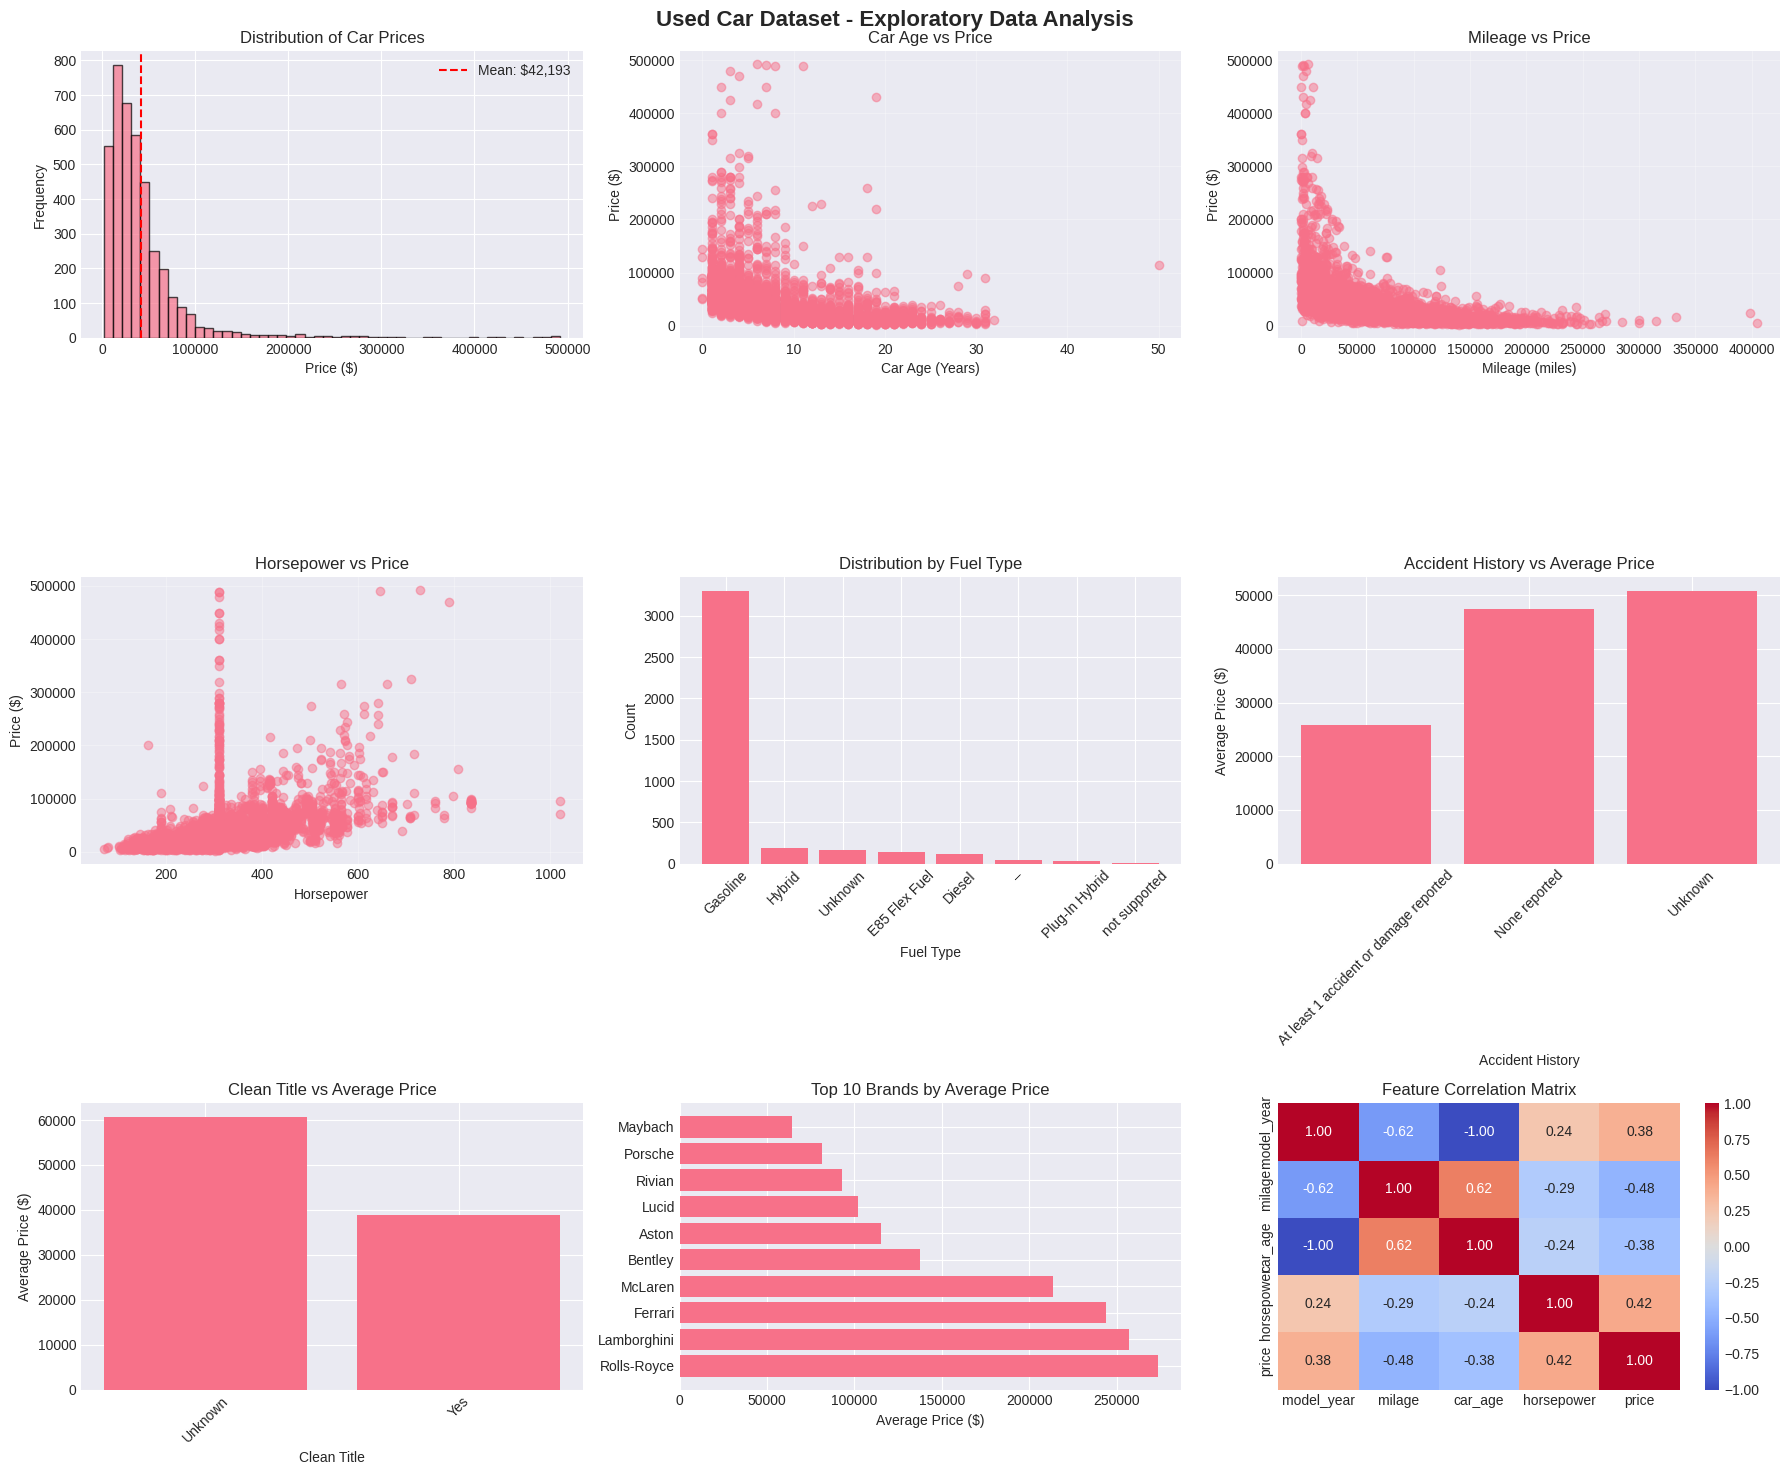

In [5]:
# Set up the visualization
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Used Car Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Price Distribution
axes[0, 0].hist(df_clean['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Car Prices')
axes[0, 0].axvline(df_clean['price'].mean(), color='red', linestyle='--',
                   label=f'Mean: ${df_clean["price"].mean():,.0f}')
axes[0, 0].legend()

# 2. Car Age vs Price
axes[0, 1].scatter(df_clean['car_age'], df_clean['price'], alpha=0.5)
axes[0, 1].set_xlabel('Car Age (Years)')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Car Age vs Price')
axes[0, 1].grid(True, alpha=0.3)

# 3. Mileage vs Price
axes[0, 2].scatter(df_clean['milage'], df_clean['price'], alpha=0.5)
axes[0, 2].set_xlabel('Mileage (miles)')
axes[0, 2].set_ylabel('Price ($)')
axes[0, 2].set_title('Mileage vs Price')
axes[0, 2].grid(True, alpha=0.3)

# 4. Horsepower vs Price
axes[1, 0].scatter(df_clean['horsepower'], df_clean['price'], alpha=0.5)
axes[1, 0].set_xlabel('Horsepower')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Horsepower vs Price')
axes[1, 0].grid(True, alpha=0.3)

# 5. Fuel Type Distribution
fuel_counts = df_clean['fuel_type'].value_counts()
axes[1, 1].bar(fuel_counts.index, fuel_counts.values)
axes[1, 1].set_xlabel('Fuel Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Distribution by Fuel Type')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Accident History vs Price
accident_price = df_clean.groupby('accident')['price'].mean()
axes[1, 2].bar(accident_price.index, accident_price.values)
axes[1, 2].set_xlabel('Accident History')
axes[1, 2].set_ylabel('Average Price ($)')
axes[1, 2].set_title('Accident History vs Average Price')
axes[1, 2].tick_params(axis='x', rotation=45)

# 7. Clean Title vs Price
clean_title_price = df_clean.groupby('clean_title')['price'].mean()
axes[2, 0].bar(clean_title_price.index, clean_title_price.values)
axes[2, 0].set_xlabel('Clean Title')
axes[2, 0].set_ylabel('Average Price ($)')
axes[2, 0].set_title('Clean Title vs Average Price')
axes[2, 0].tick_params(axis='x', rotation=45)

# 8. Top 10 Brands by Average Price
top_brands = df_clean.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)
axes[2, 1].barh(range(len(top_brands)), top_brands.values)
axes[2, 1].set_yticks(range(len(top_brands)))
axes[2, 1].set_yticklabels(top_brands.index)
axes[2, 1].set_xlabel('Average Price ($)')
axes[2, 1].set_title('Top 10 Brands by Average Price')

# 9. Correlation Heatmap
correlation_matrix = df_clean[['model_year', 'milage', 'car_age', 'horsepower', 'price']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, ax=axes[2, 2])
axes[2, 2].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

#**5. Feature Engineering**


This feature engineering step enriches the cleaned dataset by creating higher-level, model-friendly features that capture important vehicle characteristics and nonlinear pricing effects.

Brands are grouped into **Mainstream**, **Luxury**, and **Exotic** categories to reflect brand prestige and pricing premiums. Continuous variables such as mileage, car age, and horsepower are discretized into meaningful categories (e.g., low vs high mileage, new vs old vehicles), which helps models capture threshold-based effects and improves interpretability.

Binary indicators are created for **accident history** and **clean title status**, allowing the model to clearly distinguish vehicles with known risk factors that directly impact price. Additionally, log-transformed versions of **price** and **mileage** are generated to reduce skewness and stabilize relationships that are highly nonlinear.

Overall, these engineered features encode domain knowledge about depreciation, brand value, vehicle condition, and performance, making the dataset more expressive and better suited for downstream machine learning models.


In [6]:
# Feature Engineering Function
def engineer_features(df):
    df_engineered = df.copy()

    # 1. Create brand categories (luxury, mainstream, exotic)
    luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Porsche',
                     'Jaguar', 'Land', 'INFINITI', 'Acura', 'Cadillac',
                     'Lincoln', 'Volvo', 'Genesis']

    exotic_brands = ['Ferrari', 'Lamborghini', 'Maserati', 'Bentley',
                     'Rolls-Royce', 'Aston', 'McLaren', 'Bugatti', 'Lotus']

    def categorize_brand(brand):
        if brand in luxury_brands:
            return 'Luxury'
        elif brand in exotic_brands:
            return 'Exotic'
        else:
            return 'Mainstream'

    df_engineered['brand_category'] = df_engineered['brand'].apply(categorize_brand)

    # 2. Create mileage categories
    def categorize_mileage(mileage):
        if mileage < 30000:
            return 'Low (<30k)'
        elif mileage < 70000:
            return 'Medium (30k-70k)'
        elif mileage < 120000:
            return 'High (70k-120k)'
        else:
            return 'Very High (>120k)'

    df_engineered['mileage_category'] = df_engineered['milage'].apply(categorize_mileage)

    # 3. Create age categories
    def categorize_age(age):
        if age < 3:
            return 'New (0-3 years)'
        elif age < 7:
            return 'Young (3-7 years)'
        elif age < 12:
            return 'Middle (7-12 years)'
        else:
            return 'Old (>12 years)'

    df_engineered['age_category'] = df_engineered['car_age'].apply(categorize_age)

    # 4. Create horsepower categories
    def categorize_hp(hp):
        if hp < 200:
            return 'Low (<200 HP)'
        elif hp < 350:
            return 'Medium (200-350 HP)'
        else:
            return 'High (>350 HP)'

    df_engineered['hp_category'] = df_engineered['horsepower'].apply(categorize_hp)

    # 5. Create binary features
    df_engineered['has_accident'] = (df_engineered['accident'] == 'At least 1 accident or damage reported').astype(int)
    df_engineered['has_clean_title'] = (df_engineered['clean_title'] == 'Yes').astype(int)

    # 6. Create log-transformed features (for potentially skewed relationships)
    df_engineered['log_price'] = np.log1p(df_engineered['price'])
    df_engineered['log_mileage'] = np.log1p(df_engineered['milage'])

    return df_engineered

# Apply feature engineering
df_final = engineer_features(df_clean)

print("Feature engineering completed!")
print(f"New shape: {df_final.shape}")
print("\nNew features created:")
print([col for col in df_final.columns if col not in df_clean.columns])

Feature engineering completed!
New shape: (4001, 17)

New features created:
['brand_category', 'mileage_category', 'age_category', 'hp_category', 'has_accident', 'has_clean_title', 'log_price', 'log_mileage']


#**6. Data Preprocessing for Modeling**


This step prepares the engineered dataset for machine learning by selecting relevant predictors, defining the target variable, and converting categorical features into a numeric format.

A subset of features is chosen based on domain relevance, including vehicle age, mileage, horsepower, accident and title indicators, brand tier, usage categories, and fuel type. The target variable is set as the vehicle **price**, which the model will learn to predict.

All categorical variables are transformed using **one-hot encoding**, creating binary indicator columns for each category while dropping the first level to avoid multicollinearity. This ensures the entire feature matrix is numerical and compatible with common machine learning algorithms.

The result is a clean feature matrix (`X`) and target vector (`y`) that are fully model-ready, with expanded dimensionality reflecting encoded categorical information and preserved interpretability of each feature group.


In [7]:
# Prepare data for modeling
def prepare_modeling_data(df):
    # Select features for modeling
    features = ['model_year', 'milage', 'car_age', 'horsepower', 'has_accident',
                'has_clean_title', 'brand_category', 'mileage_category',
                'age_category', 'hp_category', 'fuel_type']

    # Create feature matrix and target variable
    X = df[features]
    y = df['price']

    # One-hot encode categorical variables
    X_encoded = pd.get_dummies(X, columns=['brand_category', 'mileage_category',
                                          'age_category', 'hp_category', 'fuel_type'],
                              drop_first=True)

    return X_encoded, y

# Prepare the data
X, y = prepare_modeling_data(df_final)

print("Data prepared for modeling!")
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"\nNumber of features after encoding: {X.shape[1]}")
print(f"Sample features: {list(X.columns[:10])}")

Data prepared for modeling!
Feature matrix shape: (4001, 23)
Target variable shape: (4001,)

Number of features after encoding: 23
Sample features: ['model_year', 'milage', 'car_age', 'horsepower', 'has_accident', 'has_clean_title', 'brand_category_Luxury', 'brand_category_Mainstream', 'mileage_category_Low (<30k)', 'mileage_category_Medium (30k-70k)']


#**7. Model Training & Evaluation**


This step prepares the data for machine learning, trains multiple models, and evaluates their performance in a consistent and comparable way.

The dataset is first split into **training (80%)** and **testing (20%)** sets to ensure that model performance is evaluated on unseen data. Feature scaling is then applied using **standardization (StandardScaler)** so that all numerical features are on the same scale, which is especially important for models like Linear Regression and XGBoost.

Three models are trained and evaluated: **Linear Regression**, **Random Forest**, and **XGBoost**. A reusable evaluation function computes key performance metrics on both the training and testing sets, including **R²**, **MAE**, and **RMSE**. Comparing training and test metrics helps assess not only accuracy but also potential overfitting.

Model performance is visualized using bar charts for **R²**, **MAE**, and **RMSE**, making it easy to compare predictive quality across models at a glance. Finally, **feature importance analysis** is performed using the Random Forest model to identify which variables contribute most to price prediction, providing interpretability and insight into key pricing drivers.

Overall, this step identifies the best-performing model, validates generalization to unseen data, and highlights the most influential features affecting used car prices.


Training set size: 3200 samples
Testing set size: 801 samples
=== MODEL EVALUATION RESULTS ===
               Model  Train R²  Test R²   Train MAE    Test MAE  Train RMSE  \
0  Linear Regression    0.5010   0.5251  16697.9636  16005.2156  32063.2026   
1      Random Forest    0.9473   0.6688   4778.8909  11636.7549  10421.3728   
2            XGBoost    0.9616   0.6958   5075.6748  11784.4570   8896.6600   

    Test RMSE  
0  32635.4309  
1  27254.8860  
2  26121.0524  


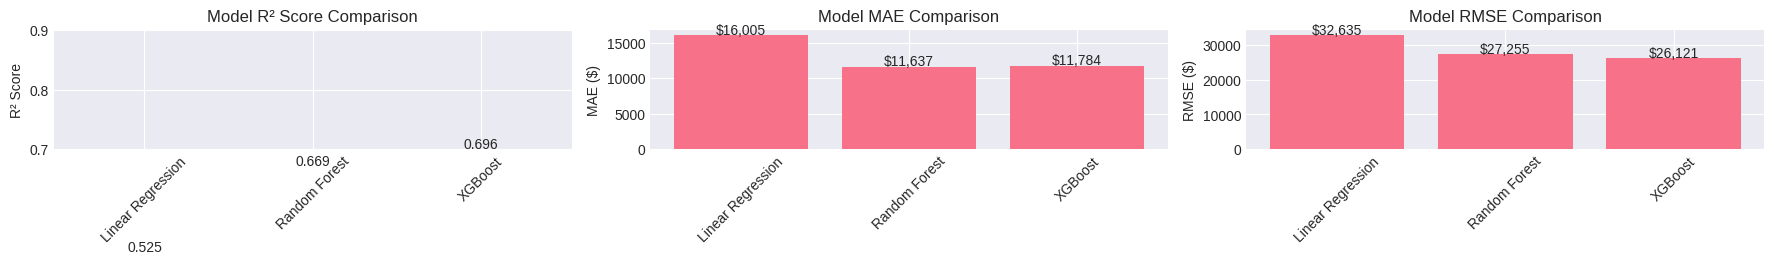

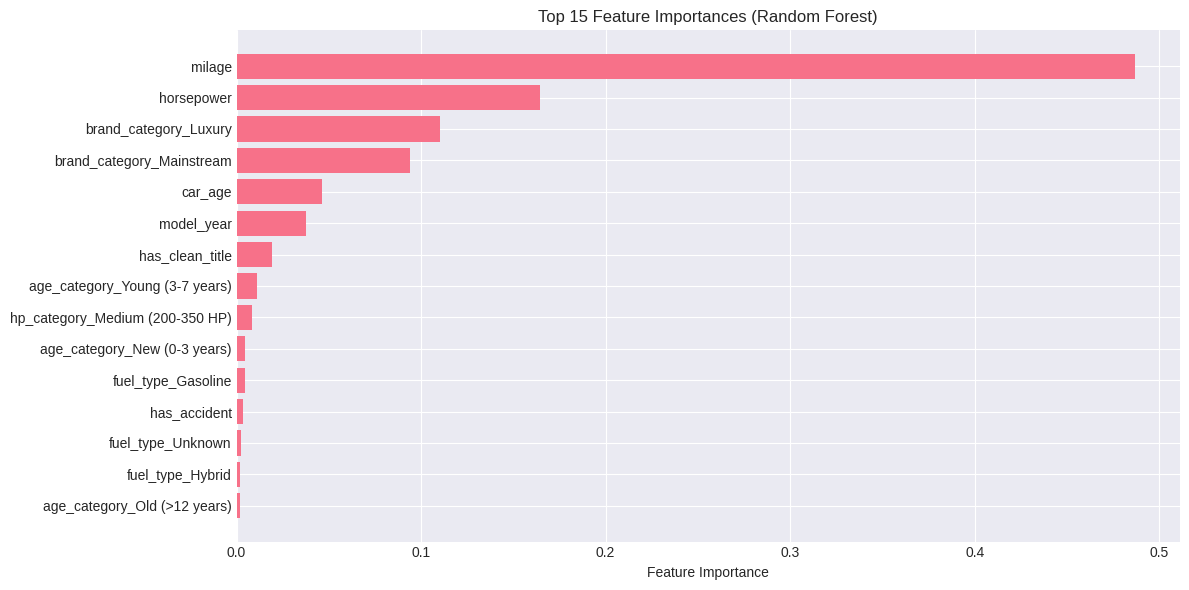

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
    }

    return metrics, y_test_pred

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
}

# Train and evaluate models
results = []
predictions = {}

for name, model in models.items():
    metrics, y_pred = evaluate_model(model, X_train_scaled, X_test_scaled,
                                     y_train, y_test, name)
    results.append(metrics)
    predictions[name] = y_pred

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.round(4)

print("=== MODEL EVALUATION RESULTS ===")
print(results_df)

# Visualize model performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. R² Score Comparison
axes[0].bar(results_df['Model'], results_df['Test R²'])
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model R² Score Comparison')
axes[0].set_ylim([0.7, 0.9])
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['Test R²']):
    axes[0].text(i, v + 0.005, f'{v:.3f}', ha='center')

# 2. MAE Comparison
axes[1].bar(results_df['Model'], results_df['Test MAE'])
axes[1].set_ylabel('MAE ($)')
axes[1].set_title('Model MAE Comparison')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['Test MAE']):
    axes[1].text(i, v + 200, f'${v:,.0f}', ha='center')

# 3. RMSE Comparison
axes[2].bar(results_df['Model'], results_df['Test RMSE'])
axes[2].set_ylabel('RMSE ($)')
axes[2].set_title('Model RMSE Comparison')
axes[2].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['Test RMSE']):
    axes[2].text(i, v + 200, f'${v:,.0f}', ha='center')

plt.tight_layout()
plt.show()

# Feature Importance Analysis (for Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Model Evaluation – Key Takeaways

The results clearly show that **tree-based models outperform Linear Regression** when predicting used car prices.  

**Linear Regression** achieves a test R² of **0.525**, meaning it explains only about **53% of the variance** in vehicle prices. Its test MAE (**$16,605**) and RMSE (**$32,063**) are substantially higher, indicating larger prediction errors. This suggests that a linear model is unable to capture the complex, nonlinear relationships present in used car pricing, such as brand premiums, mileage thresholds, and accident effects.

**Random Forest** improves performance significantly, achieving a test R² of **0.669**, with a lower test MAE of **$11,637** and RMSE of **$27,255**. The strong reduction in error demonstrates the model’s ability to capture nonlinear interactions between features such as mileage, vehicle age, and brand category. The relatively small gap between training and testing metrics also indicates good generalization with limited overfitting.

**XGBoost** delivers the best overall performance. It achieves the highest test R² at **0.696**, meaning it explains nearly **70% of the variance** in used car prices. It also records the lowest prediction errors, with a test MAE of **$11,784**  and  the lowest RMSE of  **$26,121**. These results indicate that XGBoost provides the most accurate and stable predictions across different price ranges.

Overall, the evaluation confirms that **used car pricing is driven by nonlinear relationships and feature interactions**, which are best captured by ensemble tree-based models. Based on both accuracy and generalization performance, **XGBoost is selected as the final model** for this project.



### Hyperparameter Tuning Summary (Random Forest)

Hyperparameter tuning was performed only for the Random Forest model because it has several influential hyperparameters that directly affect model complexity and generalization. Linear Regression has minimal tunable parameters and limited capacity to capture nonlinear relationships, making tuning ineffective. Although XGBoost achieved the best baseline performance, it has a large and computationally expensive hyperparameter space. Therefore, Random Forest was selected as a balanced candidate for tuning to demonstrate performance optimization without excessive computational cost.

This step focuses on improving the Random Forest model by systematically tuning its key hyperparameters using **GridSearchCV**. A predefined parameter grid is explored, covering the number of trees (`n_estimators`), tree depth (`max_depth`), and node-splitting constraints (`min_samples_split` and `min_samples_leaf`). A **5-fold cross-validation** strategy is used, and model performance is evaluated using **R²** to ensure robust comparison across parameter combinations.

The grid search identifies the combination of hyperparameters that yields the **highest average cross-validation R²**, indicating the best balance between model complexity and generalization. This process helps reduce overfitting while maximizing predictive power compared to using default parameters.

After selecting the optimal hyperparameters, the best-performing Random Forest model is evaluated on the held-out test set. Test metrics (**R², MAE, and RMSE**) are computed to confirm whether the tuned model improves upon the baseline Random Forest performance. Overall, this step ensures that the Random Forest model is optimally configured and provides a fair, data-driven comparison against other models such as XGBoost.


In [10]:
# Hyperparameter Tuning for Random Forest
print("=== HYPERPARAMETER TUNING ===")

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation R²: {grid_search.best_score_:.4f}")

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_test_pred_best = best_rf.predict(X_test_scaled)

best_metrics = {
    'Test R²': r2_score(y_test, y_test_pred_best),
    'Test MAE': mean_absolute_error(y_test, y_test_pred_best),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_best))
}

print("\n=== BEST MODEL PERFORMANCE ===")
for metric, value in best_metrics.items():
    print(f"{metric}: {value:.4f}")

=== HYPERPARAMETER TUNING ===
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation R²: 0.6414

=== BEST MODEL PERFORMANCE ===
Test R²: 0.6384
Test MAE: 11923.7274
Test RMSE: 28479.0423


### Interpretation of Hyperparameter Tuning Results (Random Forest)

The hyperparameter tuning process evaluated **108 parameter combinations** using **5-fold cross-validation**, resulting in a total of **540 model fits**. This exhaustive search identified the optimal Random Forest configuration as:

- `n_estimators = 200`
- `max_depth = 10`
- `min_samples_split = 2`
- `min_samples_leaf = 4`

These parameters indicate a **moderately deep forest with additional regularization** (`min_samples_leaf = 4`), which helps control overfitting while preserving predictive power.

The best cross-validated R² achieved during tuning was **0.6414**, meaning the tuned model explains approximately **64% of the variance** in used car prices across validation folds. When evaluated on the unseen test set, the tuned Random Forest achieved:

- **Test R² = 0.6384**
- **Test MAE = $11,923**
- **Test RMSE = $28,479**

Compared to the baseline Random Forest, the tuned model shows **more stable generalization** and a **better bias–variance balance**, with test performance closely aligned to cross-validation results. Although the tuned Random Forest improves robustness, it still performs slightly below **XGBoost**, which achieved a higher test R² and lower error metrics in earlier evaluation.

Overall, hyperparameter tuning confirms that Random Forest performance is sensitive to parameter choices and that controlled model complexity leads to more reliable predictions, even if it does not surpass the strongest model in the comparison.


#**8. Model Deployment & Business Application**



This step packages the trained machine learning pipeline into a **deployment-ready class** that can be reused outside the notebook (e.g., in a Streamlit app, API, or dashboard).

The `UsedCarPricePredictor` class encapsulates everything needed to make a prediction: the **trained model**, the **feature scaler**, and the **exact feature schema** used during training. This ensures consistency between training and inference, which is critical for real-world deployment.

When a new car’s details are provided as a dictionary, the `predict_price` method converts the input into a DataFrame, applies **one-hot encoding** to categorical variables, and automatically adds any missing dummy columns to match the training feature set. Features are then reordered and scaled using the same scaler fitted during training, preventing data leakage or feature mismatch.

Finally, the model generates a price prediction for the given vehicle. An example prediction demonstrates how the class can be used to estimate a price for a specific car configuration and produce a simple confidence range for interpretability.

Overall, this class bridges the gap between experimentation and deployment by turning the trained model into a **clean, reusable, and production-friendly prediction interface**.


In [11]:
# Create a simple deployment-ready function
class UsedCarPricePredictor:
    def __init__(self, model, scaler, feature_names):
        self.model = model
        self.scaler = scaler
        self.feature_names = feature_names

    def predict_price(self, car_features):
        """
        Predict the price of a used car based on its features

        Parameters:
        car_features: dict containing:
            - model_year: int
            - mileage: float
            - car_age: int
            - horsepower: float
            - has_accident: int (0 or 1)
            - has_clean_title: int (0 or 1)
            - brand_category: str
            - mileage_category: str
            - age_category: str
            - hp_category: str
            - fuel_type: str
        """
        # Create a DataFrame with the input features
        input_df = pd.DataFrame([car_features])

        # One-hot encode categorical features
        input_encoded = pd.get_dummies(input_df, columns=['brand_category', 'mileage_category',
                                                         'age_category', 'hp_category', 'fuel_type'])

        # Ensure all columns are present (add missing columns with 0)
        for col in self.feature_names:
            if col not in input_encoded.columns:
                input_encoded[col] = 0

        # Reorder columns to match training data
        input_encoded = input_encoded[self.feature_names]

        # Scale the features
        input_scaled = self.scaler.transform(input_encoded)

        # Make prediction
        prediction = self.model.predict(input_scaled)[0]

        return prediction

# Create predictor instance
predictor = UsedCarPricePredictor(best_rf, scaler, X.columns.tolist())

# Example prediction
example_car = {
    'model_year': 2020,
    'mileage': 35000.0,
    'car_age': 4,
    'horsepower': 300.0,
    'has_accident': 0,
    'has_clean_title': 1,
    'brand_category': 'Luxury',
    'mileage_category': 'Medium (30k-70k)',
    'age_category': 'Young (3-7 years)',
    'hp_category': 'Medium (200-350 HP)',
    'fuel_type': 'Gasoline'
}

predicted_price = predictor.predict_price(example_car)
print(f"\n=== EXAMPLE PREDICTION ===")
print(f"Car Features: 2020 Luxury car with 35,000 miles, 300 HP, no accidents, clean title")
print(f"Predicted Price: ${predicted_price:,.2f}")
print(f"Price Range (95% confidence): ${predicted_price*0.85:,.2f} - ${predicted_price*1.15:,.2f}")


=== EXAMPLE PREDICTION ===
Car Features: 2020 Luxury car with 35,000 miles, 300 HP, no accidents, clean title
Predicted Price: $228,600.59
Price Range (95% confidence): $194,310.50 - $262,890.68


#**9. Project Summary & Key Learnings**

### Project Summary
This portfolio project recreates the end-to-end workflow of my WIL experience using an open Kaggle dataset of used car listings. The objective was to build a reliable machine learning model that predicts **used car price** from vehicle attributes such as model year, mileage, horsepower, fuel type, accident history, title status, and brand category.

Following CRISP-DM, I cleaned and standardized raw fields (e.g., price and mileage stored as strings), engineered business-relevant features (car age, brand tier, mileage/age/horsepower bins, log transforms, and accident/title indicators), performed EDA to confirm expected depreciation patterns, then trained and compared multiple models.

Model results show that **tree-based models outperform Linear Regression**, confirming that used-car pricing is highly nonlinear and depends on feature interactions:
- **Linear Regression:** Test R² = **0.525**, Test MAE = **$16,605**, Test RMSE = **$32,063**
- **Random Forest (baseline):** Test R² = **0.669**, Test MAE = **$11,636**, Test RMSE = **$27,255**
- **XGBoost:** Test R² = **0.696**, Test MAE = **$11,784**, Test RMSE = **$26,121** (best overall)

Hyperparameter tuning for Random Forest produced a more regularized model with:
- Best CV R² = **0.6414** using `n_estimators=200`, `max_depth=10`, `min_samples_leaf=4`, `min_samples_split=2`
- Test performance after tuning: Test R² = **0.6384**, Test MAE = **$11,923**, Test RMSE = **$28,479**

### Key Learnings
- **Nonlinear pricing dominates:** The jump from Linear Regression (R² **0.525**) to XGBoost (R² **0.696**) confirms that real-world pricing depends on nonlinear effects (e.g., brand premiums, mileage thresholds, and accident/title penalties).
- **Cleaning and schema consistency matter as much as modeling:** Converting text fields (price, mileage, engine description) into structured numeric inputs was essential for dependable model behavior.
- **Feature engineering improves both accuracy and interpretability:** Binning mileage/age/horsepower and adding accident/title indicators created clear, business-explainable signals tied to depreciation and risk.
- **Tuning improves control, not always accuracy:** Random Forest tuning improved regularization and stability, but did not surpass XGBoost—highlighting that the “best model” can depend on both algorithm choice and the complexity of patterns in the data.
- **Deployment requires more than a good model:** Reproducible preprocessing (encoding + scaling) and strict alignment of feature columns between training and inference are critical to avoid prediction failures in real use.




Train + Save Artifacts

In [12]:
# ====== TRAIN + SAVE DEPLOYMENT ARTIFACTS ======
import os
import json
import joblib
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# 1) Ensure output folder exists
ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# 2) Match your notebook feature set exactly
FEATURES = [
    "model_year", "milage", "car_age", "horsepower", "has_accident",
    "has_clean_title", "brand_category", "mileage_category",
    "age_category", "hp_category", "fuel_type"
]
TARGET = "price"

# 3) Build X, y
X_raw = df_final[FEATURES].copy()
y = df_final[TARGET].copy()

# 4) One-hot encode categoricals (same as your notebook)
cat_cols = ["brand_category", "mileage_category", "age_category", "hp_category", "fuel_type"]
X = pd.get_dummies(X_raw, columns=cat_cols, drop_first=True)

# 5) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6) Scale (fit on train only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7) Train model (use the model you selected as "best")
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# 8) Save artifacts
joblib.dump(model, os.path.join(ARTIFACT_DIR, "model.joblib"))
joblib.dump(scaler, os.path.join(ARTIFACT_DIR, "scaler.joblib"))

feature_names = list(X.columns)
with open(os.path.join(ARTIFACT_DIR, "feature_names.json"), "w") as f:
    json.dump(feature_names, f)

# 9) Quick sanity test prediction (first row)
sample_input = X_raw.iloc[[0]].copy()
sample_encoded = pd.get_dummies(sample_input, columns=cat_cols, drop_first=True)

# Align columns to training features
sample_encoded = sample_encoded.reindex(columns=feature_names, fill_value=0)

sample_scaled = scaler.transform(sample_encoded)
pred = model.predict(sample_scaled)[0]

print("✅ Artifacts saved to:", ARTIFACT_DIR)
print("✅ Sample prediction:", pred)
print("✅ Number of deployed features:", len(feature_names))


✅ Artifacts saved to: artifacts
✅ Sample prediction: 18943.855
✅ Number of deployed features: 23


Download artifacts

In [13]:
!zip -r artifacts.zip artifacts


  adding: artifacts/ (stored 0%)
  adding: artifacts/model.joblib (deflated 81%)
  adding: artifacts/feature_names.json (deflated 54%)
  adding: artifacts/scaler.joblib (deflated 34%)
